In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [19]:
path = "../data/Test_knight.csv"
data_test = pd.read_csv(path)

columns = data_test.columns
N = len(columns)

In [20]:
path = "../data/Train_knight.csv"
data_train= pd.read_csv(path)

In [21]:
encoder = LabelEncoder()
labels = encoder.fit_transform(data_train['knight'])

data_train['knight'] = labels

In [22]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(data_train)
train_scaled = pd.DataFrame(train_scaled, columns=data_train.columns)

new_knight = train_scaled['knight'].unique()
train_scaled.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,-0.672190,-0.447007,-0.701691,-0.647079,-0.408080,-0.812359,-0.770179,-0.867035,0.173459,-0.366543,...,-0.172521,-0.651490,-0.581014,-0.367009,-0.525921,-0.612764,-0.952936,-0.180659,-0.150547,0.786057
1,1.671168,0.731340,1.624479,1.798709,0.139449,-0.019929,0.742230,1.222095,-0.826745,-1.308423,...,0.896162,2.461756,2.839651,0.805324,0.363692,1.210294,1.882921,-0.199724,-0.424881,-1.272172
2,-0.915010,-0.461465,-0.851698,-0.825470,-0.534659,0.148840,0.066543,-0.342094,-1.177761,0.570808,...,0.225517,-0.523624,-0.740496,0.276024,0.945938,0.934721,0.607673,-0.594888,0.614445,0.786057
3,-0.724850,-0.225314,-0.654097,-0.715305,1.551689,0.874940,0.160680,0.176467,0.588639,1.499103,...,-0.020330,-0.585395,-0.644173,1.977658,0.193766,0.194437,0.394877,-0.386907,0.472398,0.786057
4,-0.830169,0.172288,-0.869971,-0.776442,-0.831973,-1.169325,-1.067454,-1.151858,-0.619156,0.122510,...,0.151931,-0.948607,-0.815952,-0.961925,-1.121724,-1.168418,-1.339338,-0.565424,-0.425966,0.786057


In [23]:
test_scaled = scaler.fit_transform(data_test)
test_scaled = pd.DataFrame(test_scaled, columns=data_test.columns)
test_scaled.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
0,-0.740658,0.148792,-0.572707,-0.731155,3.069239,3.139630,1.891994,1.366958,2.603467,4.306019,...,-0.273193,0.070985,-0.242570,-0.515696,3.458872,4.115508,2.222332,2.193850,5.258269,5.219636
1,1.081470,0.061769,1.048193,0.989469,-0.106314,0.056468,0.308853,0.611716,-0.144531,-0.729068,...,1.251771,0.249809,1.258285,1.114033,0.565163,0.061262,0.610509,1.225579,0.172789,-0.009981
2,0.129054,0.094402,0.089231,0.054033,0.161688,-0.595774,-0.167812,0.093455,-0.856342,-0.502602,...,0.522773,0.746198,0.435066,0.379454,0.662208,-0.408303,0.155959,0.739185,0.124424,-0.098976
3,-0.175078,-1.160906,-0.191591,-0.256990,0.103311,-0.432008,-0.257733,-0.022252,0.166886,-0.698872,...,-0.234925,-1.045121,-0.219641,-0.290456,0.556340,-0.473576,-0.117815,0.255803,0.050453,-0.659292
4,0.305131,-1.182662,0.388569,0.106396,0.734176,1.898609,1.477450,1.182021,2.343382,0.893936,...,0.331435,-1.072870,0.482028,0.132868,0.335783,2.311179,1.927658,1.919783,2.454498,0.913926


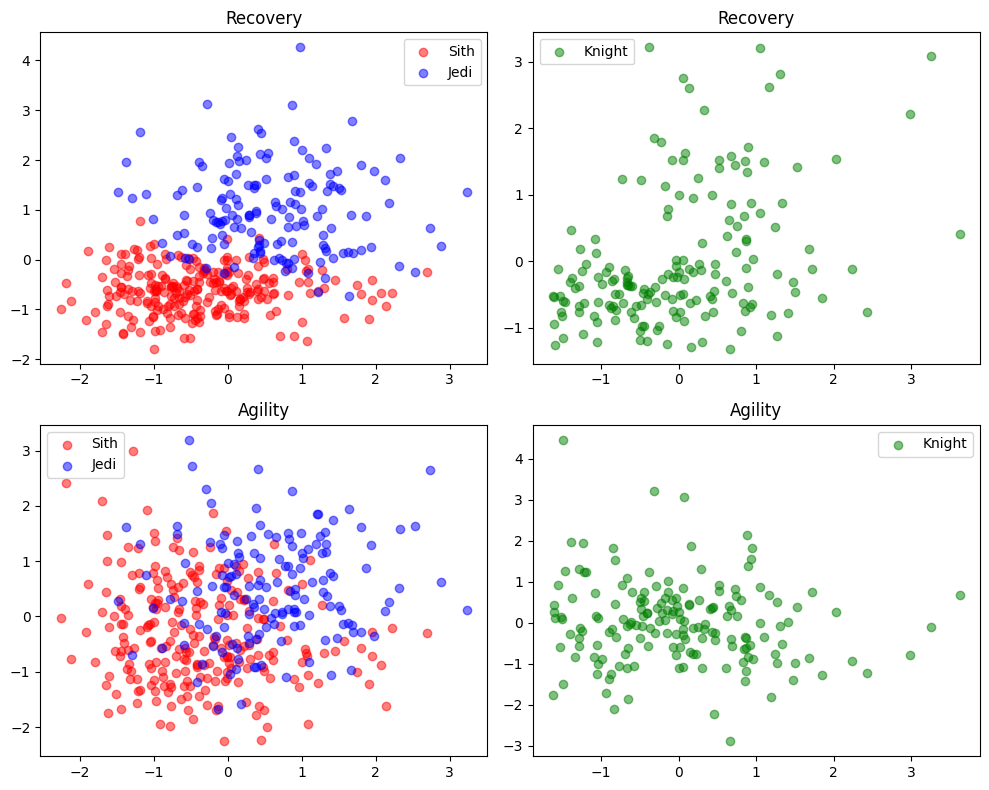

In [24]:
data_sith = train_scaled[train_scaled['knight'] == new_knight[0]]
data_jedi = train_scaled[train_scaled['knight'] == new_knight[1]]

col_test = 'Evade'

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(data_sith[col_test],data_sith['Recovery'], marker='o', alpha=0.5, c='r')
axs[0, 0].scatter(data_jedi[col_test],data_jedi['Recovery'], marker='o', alpha=0.5, c='b')
axs[0, 0].set_title('Recovery')
axs[0, 0].legend(['Sith', 'Jedi'])

axs[0, 1].scatter(test_scaled[col_test],test_scaled['Recovery'], marker='o', alpha=0.5, c='g')
axs[0, 1].set_title('Recovery')
axs[0, 1].legend(['Knight'])

axs[1, 0].scatter(data_sith[col_test],data_sith['Agility'], marker='o', alpha=0.5, c='r')
axs[1, 0].scatter(data_jedi[col_test],data_jedi['Agility'], marker='o', alpha=0.5, c='b')
axs[1, 0].set_title('Agility')
axs[1, 0].legend(['Sith', 'Jedi'])


axs[1, 1].scatter(test_scaled[col_test],test_scaled['Agility'], marker='o', alpha=0.5, c='g')
axs[1, 1].set_title('Agility')
axs[1, 1].legend(['Knight'])

plt.tight_layout()
plt.show()